In [1]:
#lib
import pandas as pd
import numpy as np
import math 

#plotting
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
# reading data
df = pd.read_csv("train.csv")

In [3]:
#exploring data
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [6]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan

[]

In [7]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [8]:
len(df.columns)

29

In [9]:
df.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [10]:
#calculating mode values 

mode_values = df.mode().iloc[0]

mode_values

id                                   0
surgery                            yes
age                              adult
hospital_number               529461.0
rectal_temp                       38.0
pulse                             48.0
respiratory_rate                  24.0
temp_of_extremities               cool
peripheral_pulse               reduced
mucous_membrane              pale_pink
capillary_refill_time       less_3_sec
pain                         depressed
peristalsis                 hypomotile
abdominal_distention          moderate
nasogastric_tube                slight
nasogastric_reflux        more_1_liter
nasogastric_reflux_ph              2.0
rectal_exam_feces               absent
abdomen                  distend_small
packed_cell_volume                57.0
total_protein                      7.5
abdomo_appearance        serosanguious
abdomo_protein                     2.0
surgical_lesion                    yes
lesion_1                        2208.0
lesion_2                 

In [11]:
# Fill NaN values in categorical columns with their respective modes
for column in df.columns:
    df[column].fillna(mode_values[column], inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [13]:
df.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [14]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [15]:
# note about each column to understand the dataset 

In [16]:
df[['id']] # unique identifier 

,id
0,0
1,1
2,2
3,3
4,4
...,...
1230,1230
1231,1231
1232,1232
1233,1233


In [17]:
df[['surgery']].head() 
# indicates if the horse had a surgery before or no 

,surgery
0,yes
1,yes
2,yes
3,yes
4,no


In [18]:
from plots import histplot

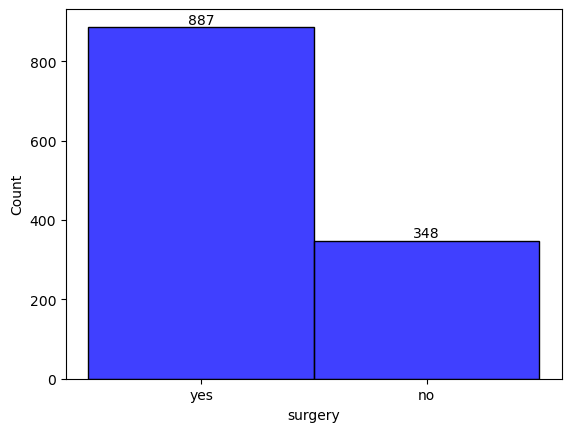

In [19]:
histplot(df['surgery'])

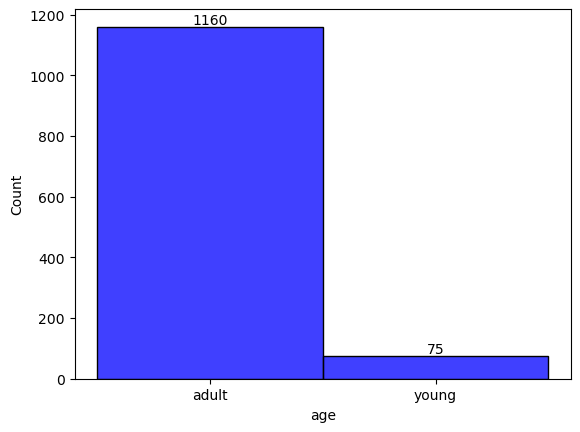

In [20]:
histplot(df['age'])

In [21]:
len(df['hospital_number'].unique())

255

Rectal temp: 

- linear - in degrees celsius. 
- An elevated temp may occur due to infection. 
- temperature may be reduced when the animal is in late shock 
- normal temp is 37.8 
- this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock



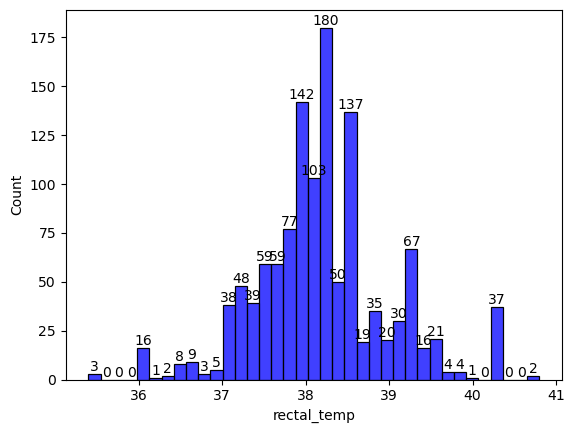

In [22]:
histplot(df['rectal_temp'])


Pulse:
- linear
- the heart rate in beats per minute 
- is a reflection of the heart condition: 30 -40 is normal for adults 
- rare to have a lower than normal rate although athletic horses may have a rate of 20-25 
- animals with painful lesions or suffering from circulatory shock may have an elevated heart rate (also drop in rectal temp)



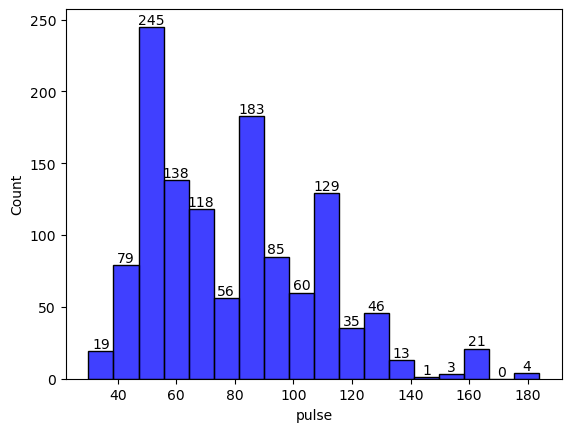

In [23]:
histplot(df['pulse'])

respiratory_rate:
- linear 
- normal rate is 8 to 10 
- usefulness is doubtful due to the great fluctuations



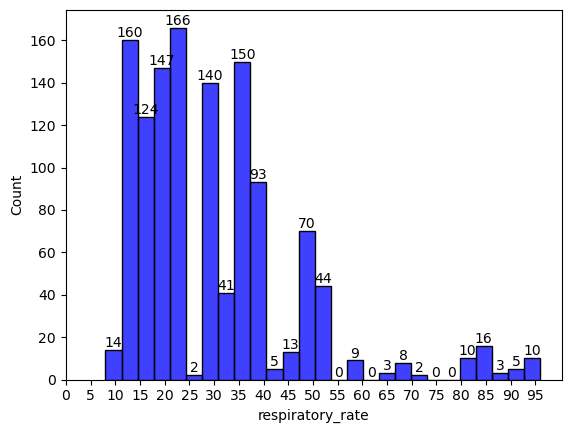

In [24]:
histplot(df['respiratory_rate'], xticks=[x for x in range(0, 100, 5)])
# i don't know how normal rate is from 8 to 10 however most of the resipratory rate is from 10 to 40 

temp_of_extremities:
- a subjective indication of peripheral circulation 
- possible values: 1 = Normal 2 = Warm 3 = Cool 4 = Cold 
- cool to cold extremities indicate possible shock 
- hot extremities should correlate with an elevated rectal temp.



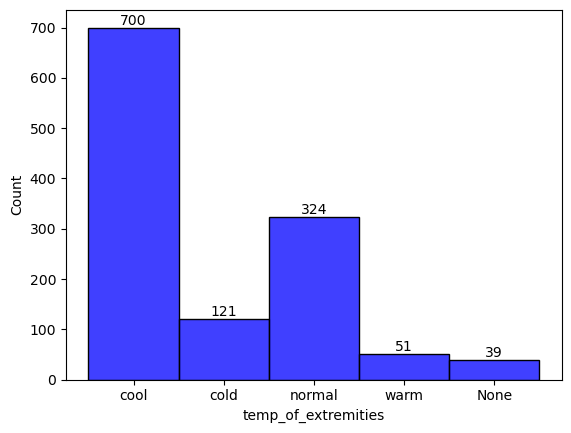

In [25]:
histplot(df['temp_of_extremities'])

In [26]:
def assign(row,mean):
    if row == 'None':
        return mean 
    else:
        return row
    
    
    

In [27]:
mean_of_temp_extremities = 'normal'
df['temp_of_extremities'] = df['temp_of_extremities'].apply(lambda row : assign(row,mean_of_temp_extremities))


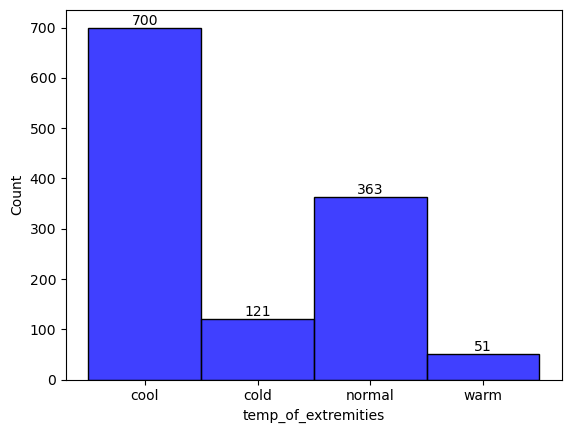

In [28]:
histplot(df['temp_of_extremities'])

peripheral_pulse
- subjective
- possible values are:
    1 = normal
    2 = increased 
    3 = reduced 
    4 = absent 
- normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion



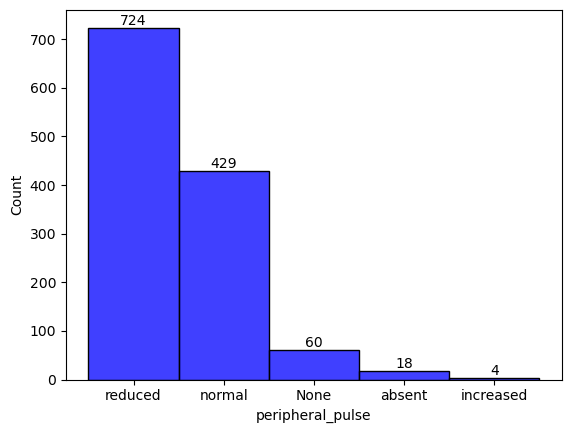

In [29]:
histplot(df['peripheral_pulse'])

In [30]:
mean_of_peripheral_pulse = 'normal'
df['peripheral_pulse'] = df['peripheral_pulse'].apply(lambda row : assign(row,mean_of_peripheral_pulse))


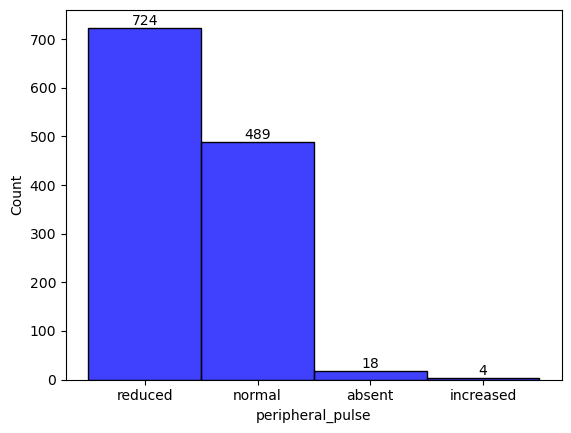

In [31]:
histplot(df['peripheral_pulse'])

mucous_membrane:
- a subjective measurement of colour 
- possible values are: 1 = normal pink 2 = bright pink 3 = pale pink 4 = pale cyanotic 5 = bright red / injected 6 = dark cyanotic 
- 1 and 2 probably indicate a normal or slightly increased circulation 
- 3 may occur in early shock 
- 4 and 6 are indicative of serious circulatory compromise 
- 5 is more indicative of a septicemia



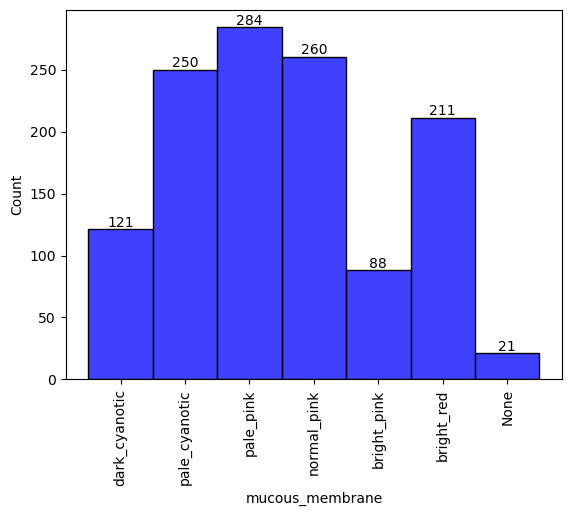

In [32]:
histplot(df['mucous_membrane'],xtick_rotation=90)

In [33]:
mean_of_mucous_membrane = 'normal_pink'
df['mucous_membrane'] = df['mucous_membrane'].apply(lambda row : assign(row,mean_of_mucous_membrane))


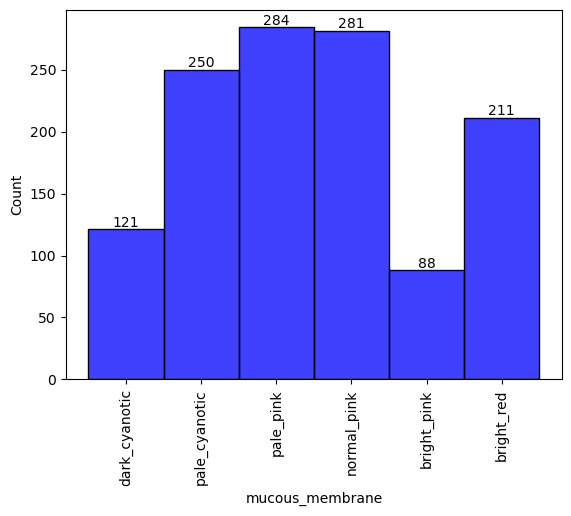

In [34]:
histplot(df['mucous_membrane'],xtick_rotation=90)

capillary_refill_time:

- a clinical judgement. The longer the refill, the poorer the circulation 
- possible values 1 = < 3 seconds 2 = >= 3 seconds



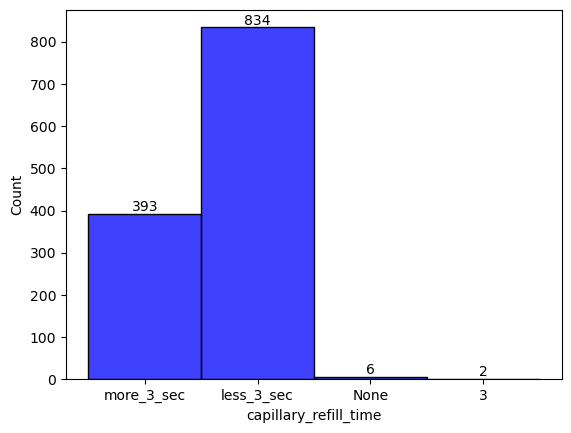

In [35]:
histplot(df['capillary_refill_time'])

In [36]:
df[
    df['capillary_refill_time']=='None'
]['rectal_temp']

64      37.5
158     38.3
278     39.0
529     38.3
835     39.9
1214    38.1
Name: rectal_temp, dtype: float64

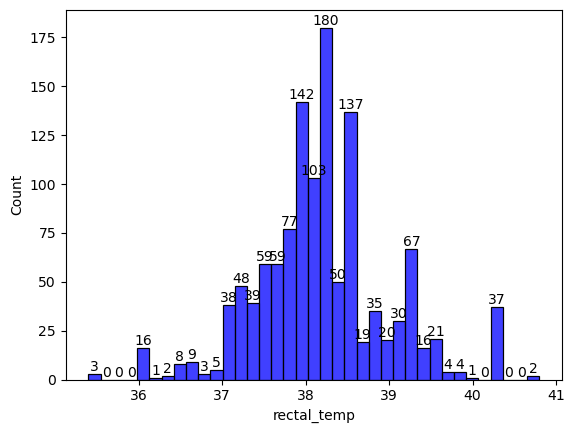

In [37]:
histplot(df['rectal_temp'])

In [38]:
df[
    df['capillary_refill_time']=='None'
]['pulse']

64       66.0
158     112.0
278      86.0
529      40.0
835      96.0
1214     60.0
Name: pulse, dtype: float64

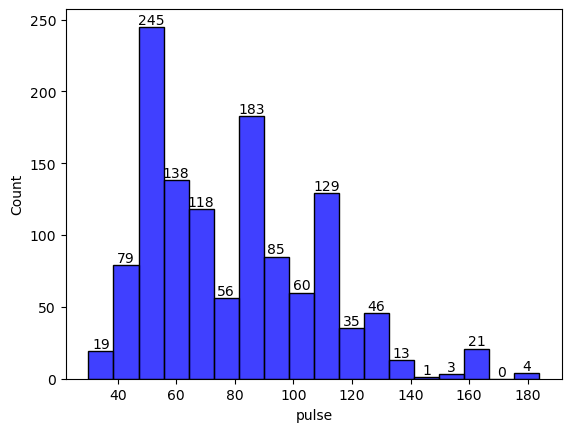

In [39]:
histplot(df['pulse'])

couldn't decide what to do with the None values at capillary_refill_time,
tried the following:
1. to check the rectal temp. 
2. to check the pulse. 

may be later when i understand the relation between pulse, rectal temp. and capillary refill time i would be able to decide what to do with None values in capillary refill time

pain
- possible values: 
    1. = alert, no pain 
    2. = depressed 
    3. = intermittent mild pain 
    4. = intermittent severe pain 
    5. = continuous severe pain 
- should NOT be treated as a ordered or discrete variable!
- In general, the more painful, the more likely it is to require surgery 
- prior treatment of pain may mask the pain level to some extent



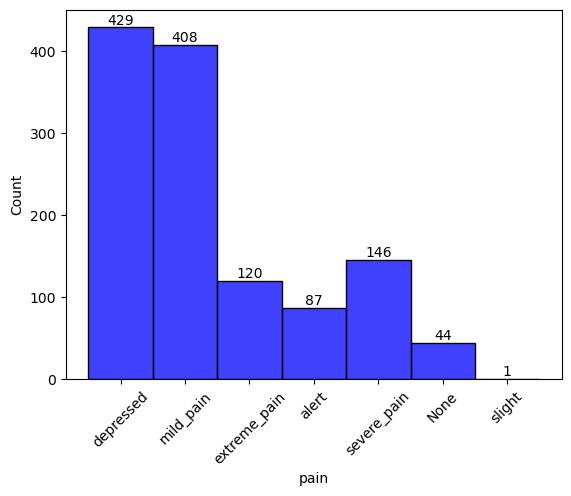

In [40]:
histplot(df['pain'],xtick_rotation=45)

# is it right to assign the None value to the mode value? 
I would leave it as it is untill i understand relations between variables more better 

peristalsis
- an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases 
- possible values: 
    1. = hypermotile 
    2. = normal 
    3. = hypomotile 
    4. = absent



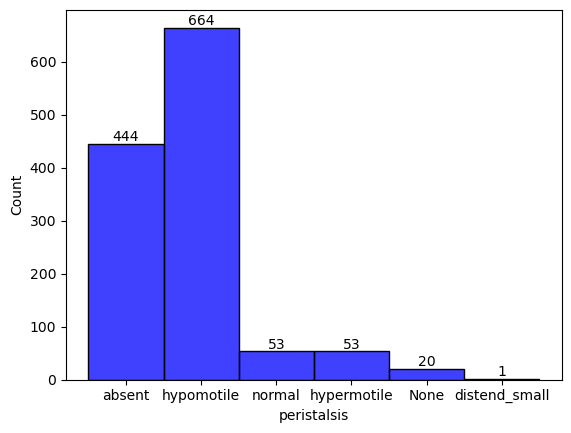

In [41]:
histplot(df['peristalsis'])

abdominal_distention
- An IMPORTANT parameter. 
- possible values 
    1. = none 
    2. = slight 
    3. = moderate 
    4. = severe 
    
- an animal with abdominal distension is likely to be painful and have reduced gut motility. 
- a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure

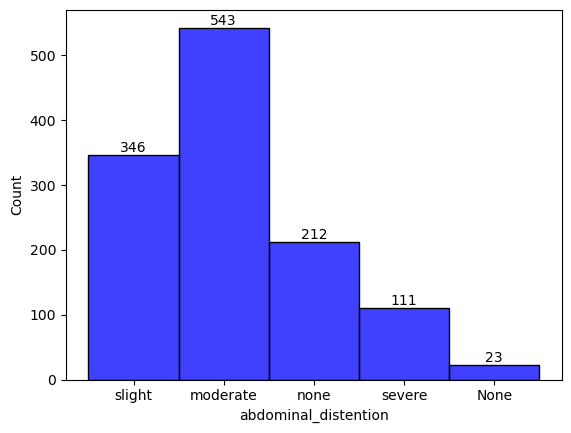

In [42]:
histplot(df['abdominal_distention'])

In [43]:
def rename_val(row,old_value,new_value):
    if row ==old_value:
        return new_value
    else:
        return row 
df['abdominal_distention'] = df['abdominal_distention'].apply(lambda row : rename_val(row,"none","None"))


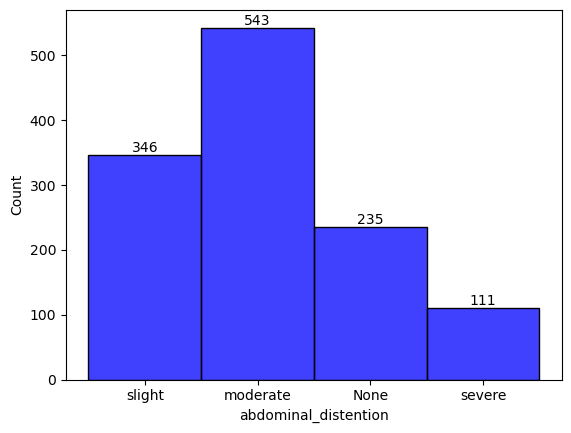

In [44]:
histplot(df['abdominal_distention'])

nasogastric_tube
- this refers to any gas coming out of the tube
- possible values: 
    1. = none 
    2. = slight 
    3. = significant 
- a large gas cap in the stomach is likely to give the horse discomfort

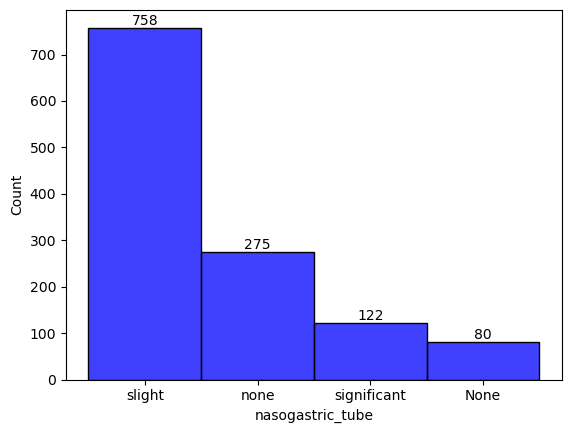

In [45]:
histplot(df['nasogastric_tube'])

In [46]:
df['nasogastric_tube'] = df['nasogastric_tube'].apply(lambda row : rename_val(row,"none","None"))


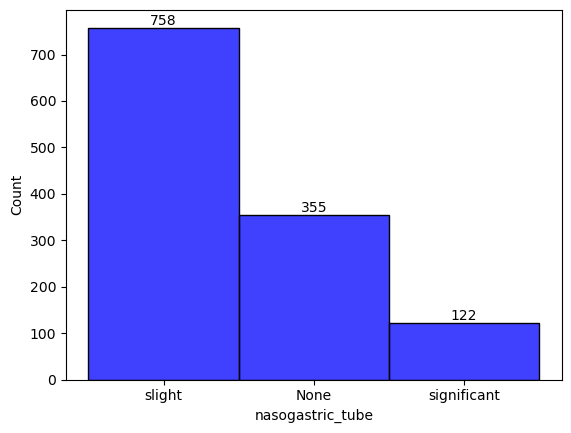

In [47]:
histplot(df['nasogastric_tube'])

nasogastric_reflux
- possible values 
    1. = none 
    2. = > 1 liter 
    3. = < 1 liter 
- the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine



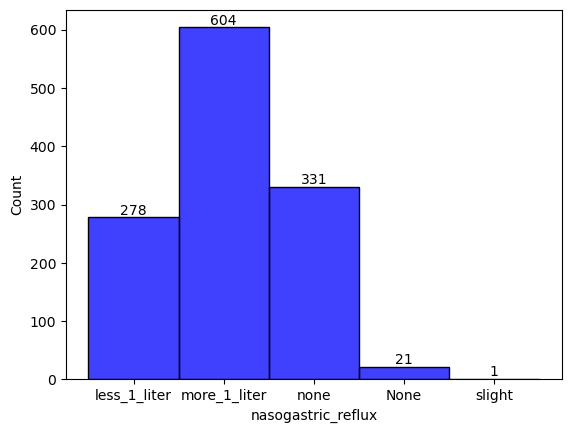

In [48]:
histplot(df['nasogastric_reflux'])

In [49]:
df['nasogastric_reflux'] = df['nasogastric_reflux'].apply(lambda row : rename_val(row,"none","None"))


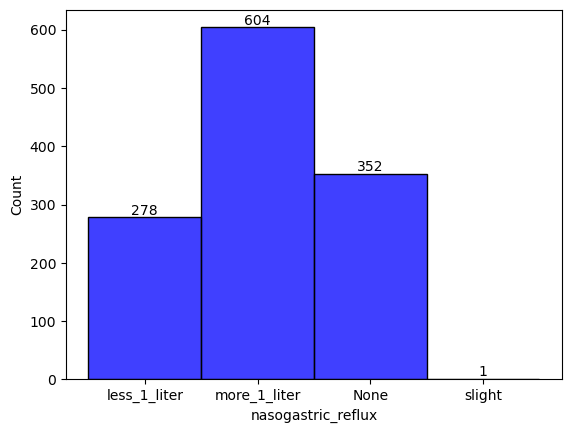

In [50]:
histplot(df['nasogastric_reflux'])

nasogastric_reflux_ph
- linear 
- scale is from 0 to 14 with 7 being neutral 
- normal values are in the 3 to 4 range



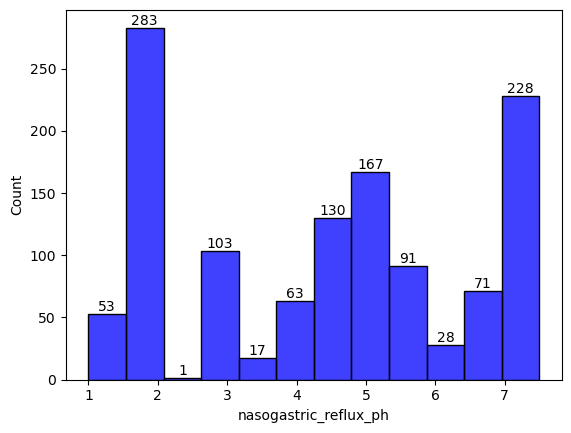

In [51]:
histplot(df['nasogastric_reflux_ph'])

rectal_exam_feces
- possible values 
    1. = normal 
    2. = increased 
    3. = decreased 
    4. = absent 
- absent feces probably indicates an obstruction



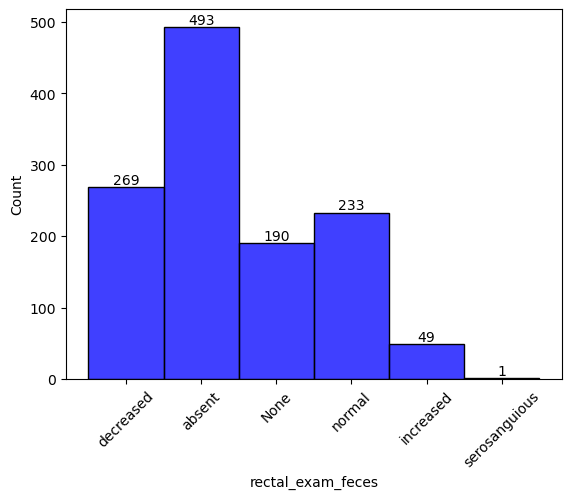

In [52]:
histplot(df['rectal_exam_feces'],xtick_rotation=45)

abdomen
- possible values:
    1. = normal 
    2. = other 
    3. = firm feces in the large intestine 
    4. = distended small intestine 
    5. = distended large intestine 
- 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically 
- 4 and 5 indicate a surgical lesion



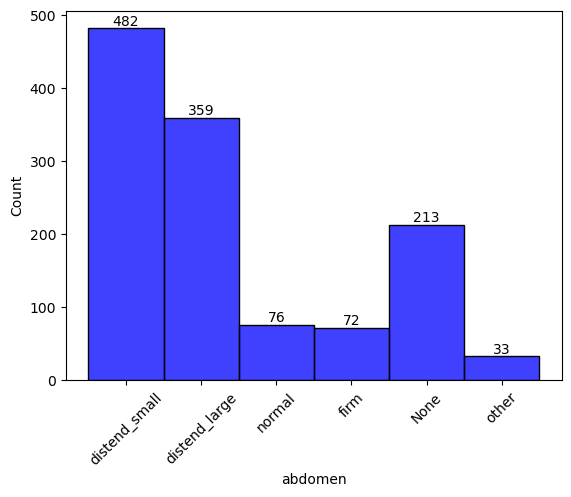

In [53]:
histplot(df['abdomen'],xtick_rotation=45)

packed_cell_volume
- linear 
- the # of red cells by volume in the blood 
- normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.



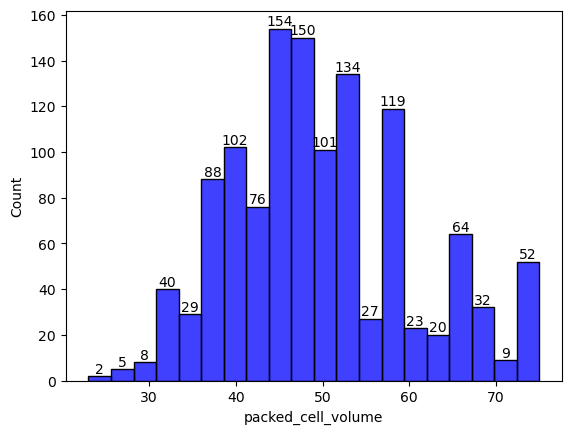

In [54]:
histplot(df['packed_cell_volume'])

total_protein
- linear 
- normal values lie in the 6-7.5 (gms/dL) range 
- the higher the value the greater the dehydration



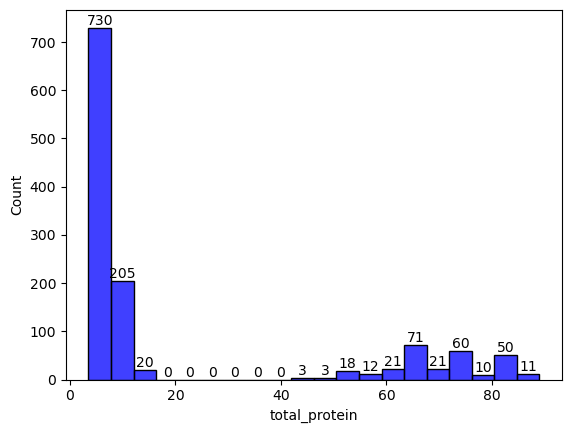

In [55]:
histplot(df['total_protein'],bins=20)

abdomo_appearance
- a needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity 
- possible values: 
    1. = clear 
    2. = cloudy 
    3. = serosanguinous 
- normal fluid is clear while cloudy or serosanguinous indicates a compromised gut



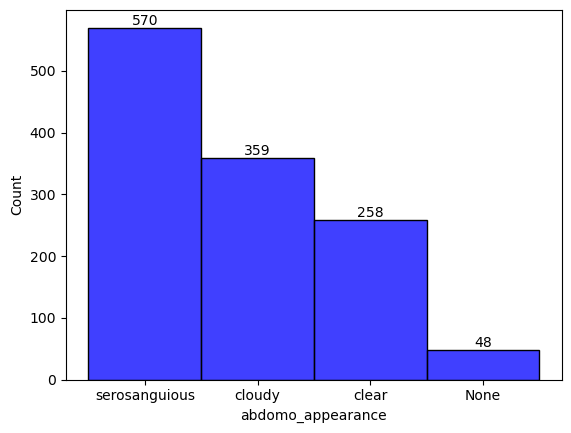

In [56]:
histplot(df['abdomo_appearance'])

abdomo_protein
- linear 
- the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL



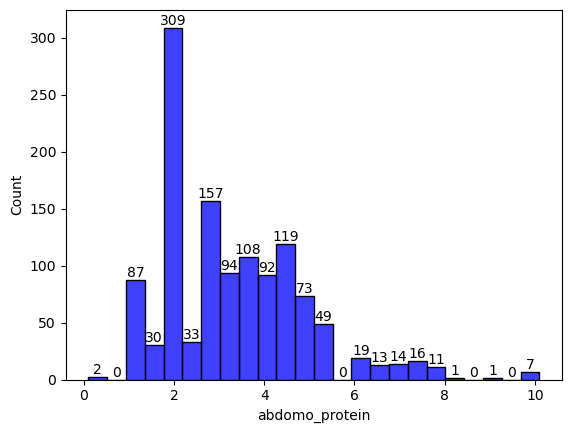

In [57]:
histplot(df['abdomo_protein'])

surgical_lesion:
- retrospectively, was the problem (lesion) surgical? 
- all cases are either operated upon or autopsied so that this value and the lesion type are always known 
- possible values:
    1. = Yes
    2. = No



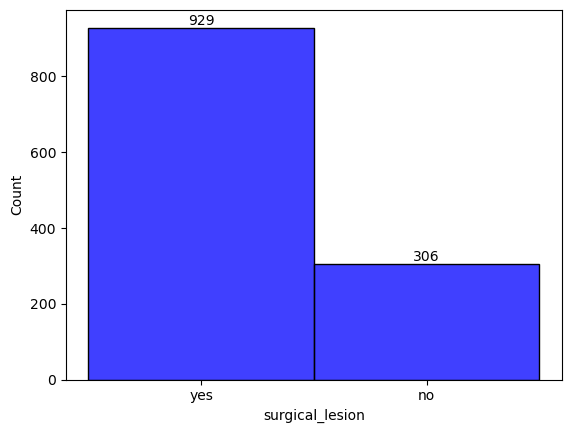

In [58]:
histplot(df['surgical_lesion'])

lesion_1
- first number is site of lesion 
    1. = gastric 
    2. = sm intestine 
    3. = lg colon 
    4. = lg colon and cecum 
    5. = cecum 
    6. = transverse colon 
    7. = retum/descending colon 
    8. = uterus 
    9. = bladder 
    11. = all intestinal sites 00 = none



In [59]:
def get_first_letter(val):
    return str(val)[0]

In [60]:
df['lesion_1'] = df['lesion_1'].apply(get_first_letter)


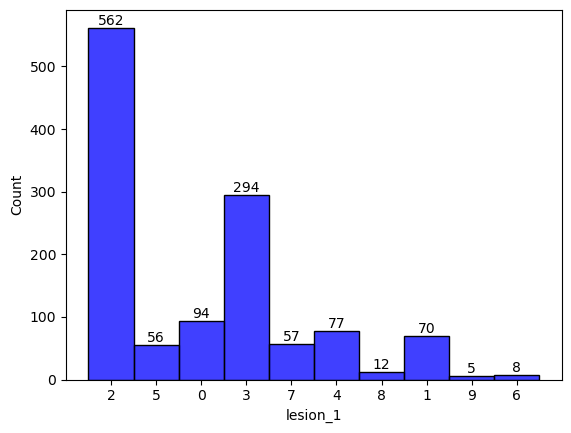

In [61]:
histplot(df['lesion_1'])

lesion_2
- second number is type 1 = simple 2 = strangulation 3 = inflammation 4 = other



In [62]:
def get_sec_letter(val):
    if val == 0:
        return val 
    
    return str(val)[1]


In [63]:
df['lesion_2'] = df['lesion_2'].apply(get_sec_letter)


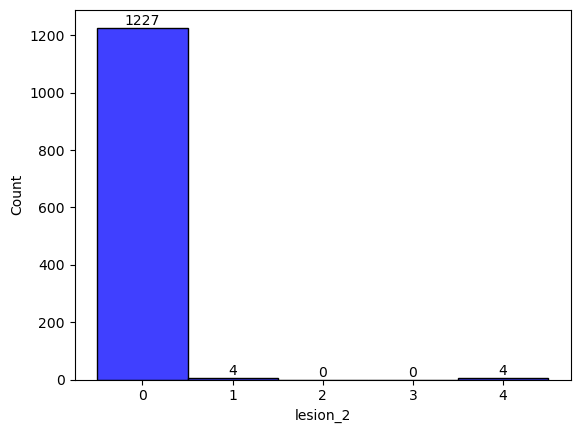

In [64]:
histplot(df['lesion_2'])

lesion_3
- third number is subtype 1 = mechanical 2 = paralytic 0 = n/a 
- fourth number is specific code 1 = obturation 2 = intrinsic 3 = extrinsic 4 = adynamic 5 = volvulus/torsion 6 = intussuption 7 = thromboembolic 8 = hernia 9 = lipoma/slenic incarceration 10 = displacement 0 = n/a



In [65]:
df['lesion_3']

0       0
1       0
2       0
3       0
4       0
       ..
1230    0
1231    0
1232    0
1233    0
1234    0
Name: lesion_3, Length: 1235, dtype: int64

In [66]:
def get_third_letter(val):
    if val == 0:
        return val 
    
    return str(val)[2]


In [67]:
df['lesion_3'] = df['lesion_3'].apply(get_third_letter)

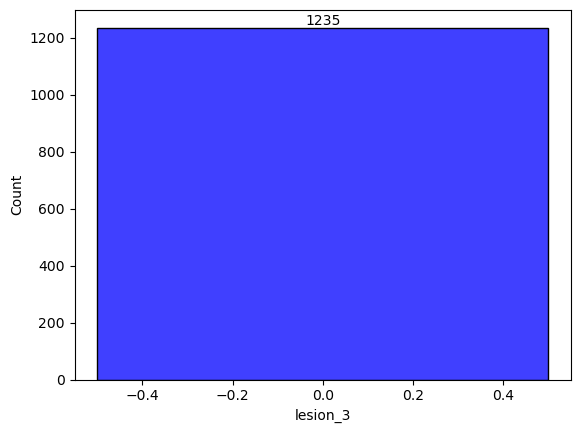

In [68]:
histplot(df['lesion_3'])

cp_data
- is pathology data present for this case? 1 = Yes 2 = No

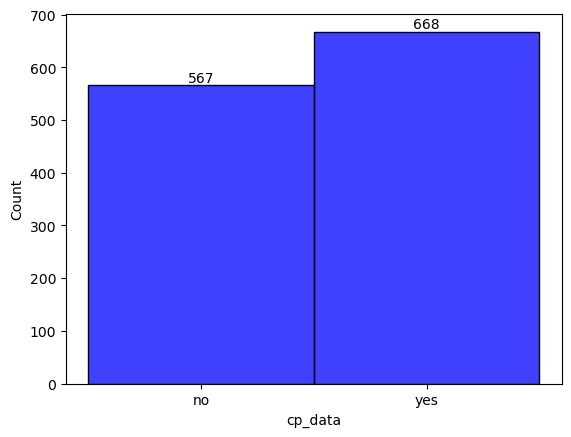

In [69]:
histplot(df['cp_data'])

In [70]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

outcome
- what eventually happened to the horse?
- possible values:
    1. = lived 
    2. = died 
    3. = was euthanized



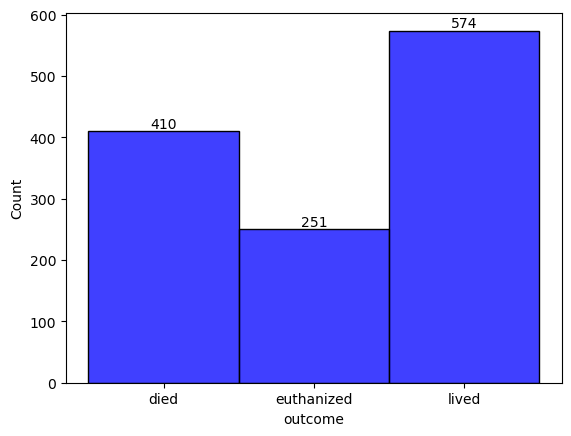

In [71]:
histplot(df['outcome'])

I have decided to make all euthanized to died 


In [72]:
df['outcome'] = df['outcome'].apply(lambda val : rename_val(val,"euthanized",'died'))

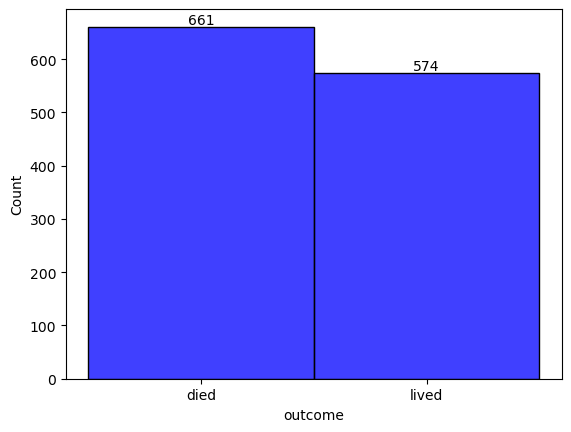

In [73]:
histplot(df['outcome'])

In [84]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

c:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the 

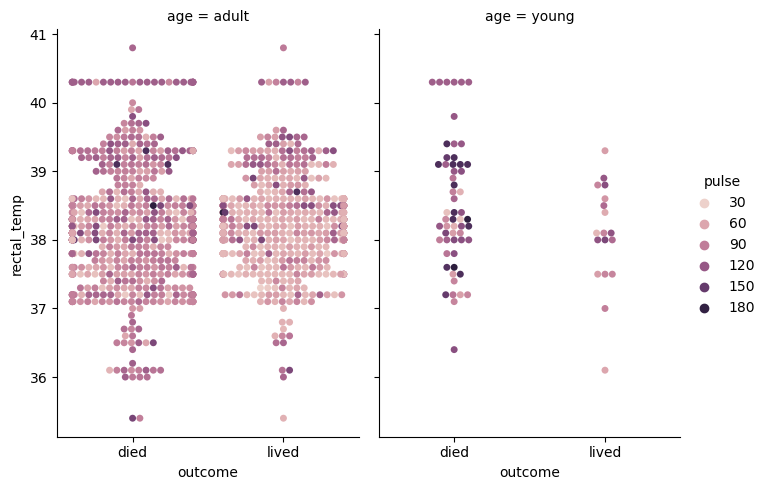

In [86]:
sns.catplot(
    data=df, x="outcome", y="rectal_temp", hue="pulse",
    kind="swarm", col="age", aspect=.7,
)
